In [7]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [8]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [9]:
data_dir


'.\\datasets\\flower_photos'

In [10]:
import pathlib

In [11]:
data_dir=pathlib.Path(data_dir)
data_dir
# It is done to convert it from string path to windows path.

WindowsPath('datasets/flower_photos')

In [12]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [13]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [14]:
roses = list(data_dir.glob('roses/*'))
tulips = list(data_dir.glob('tulips/*'))
daisy = list(data_dir.glob('daisy/*'))
dandelion = list(data_dir.glob('dandelion/*'))
sunflowers = list(data_dir.glob('sunflowers/*'))

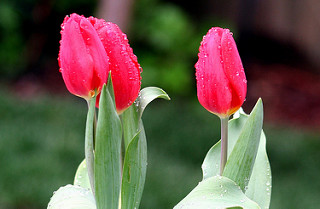

In [15]:
# we can also use cv2.imshow function used to display an image but It takes the image as input and opens a new window to display the image.
PIL.Image.open(str(tulips[0]))

In [16]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [17]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [18]:
x, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [19]:
x = np.array(x)
y = np.array(y)

In [20]:

from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [22]:
x_train_scale=x_train/255
x_test_scale=x_test/255

In [23]:
model = keras.Sequential([
     keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(5)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(x_train_scale, y_train, epochs=5) 

Epoch 1/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 206ms/step - accuracy: 0.2915 - loss: 1.7639
Epoch 2/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 190ms/step - accuracy: 0.5859 - loss: 1.0484
Epoch 3/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 194ms/step - accuracy: 0.6569 - loss: 0.8909
Epoch 4/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 190ms/step - accuracy: 0.7547 - loss: 0.6728
Epoch 5/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 199ms/step - accuracy: 0.8495 - loss: 0.4459


In [24]:
model.evaluate(x_test_scale,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.6545 - loss: 1.0190


[1.03462815284729, 0.6590414047241211]

### Here we see that while train accuracy is very high, the test accuracy is significantly low indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting.

In [25]:
y_predict = model.predict(x_test_scale)
y_predict[0]

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step


array([ 2.2687097 ,  7.0836887 ,  2.051234  , -9.38283   , -0.96117204],
      dtype=float32)

In [26]:
np.argmax(y_predict[0])

1

In [27]:
y_test[0]

1

### To improve accuracy we use Data Augmentation Method.

In [28]:
data_augmentation = keras.Sequential(
  [
    keras.layers.RandomFlip("horizontal_and_vertical"),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
  ]
)

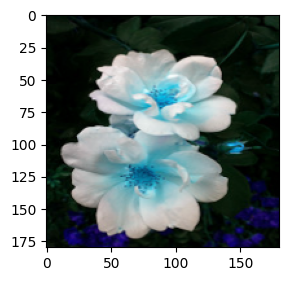

In [32]:
plt.figure(figsize=(3,4))
plt.imshow(x[0])

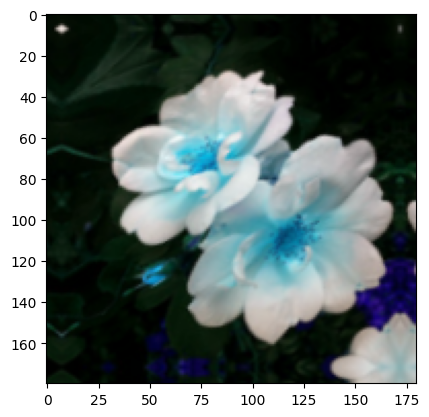

In [31]:
# Data augmented image
plt.imshow(data_augmentation(x)[0].numpy().astype("uint8"))

In [33]:
model = keras.Sequential([
     data_augmentation,
     keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(5)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(x_train_scale, y_train, epochs=5) 

Epoch 1/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 27s 280ms/step - accuracy: 0.3306 - loss: 1.5151
Epoch 2/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 242ms/step - accuracy: 0.5527 - loss: 1.0994
Epoch 3/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 235ms/step - accuracy: 0.6225 - loss: 0.9838
Epoch 4/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 242ms/step - accuracy: 0.6396 - loss: 0.8997
Epoch 5/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 243ms/step - accuracy: 0.6698 - loss: 0.8775


In [34]:
model.evaluate(x_test_scale,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.6414 - loss: 0.9192


[0.944354772567749, 0.6383442282676697]